<div style="color:#00425A;font-size:30px;font-family:Georgia;text-align:center;">Libraries & Settings </div>

In [39]:

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


<a id = "1"></a>
<div style="color:#00425A;font-size:30px;font-family:Georgia;text-align:center;">Import & Understand </div>

In [40]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_PassengerId = test_df["PassengerId"]

train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)


train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1.000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1.000,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1.000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0.000,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [41]:
#test_df.describe().T
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.000,655.000,378.020,1.000,328.000,655.000,982.000,1309.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,1309.000,2.295,0.838,1.000,2.000,3.000,3.000,3.000
Age,1046.000,29.881,14.413,0.170,21.000,28.000,39.000,80.000
SibSp,1309.000,0.499,1.042,0.000,0.000,0.000,1.000,8.000
Parch,1309.000,0.385,0.866,0.000,0.000,0.000,0.000,9.000
Fare,1308.000,33.295,51.759,0.000,7.896,14.454,31.275,512.329


In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [48]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(90,'~'))
    print('SHAPE{}'.format(dataframe.shape))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(90,'~'))
    #print(dataframe.dtypes)
    print(" MISSING VALUES ".center(90,'~'))
    #print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(90,'~'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(90,'~'))
    print(dataframe.describe().T)
    

check_df(train_df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SHAPE(1309, 12)
Rows: 1309
Columns: 12
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ MISSING VALUES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ DUPLICATED VALUES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ DESCRIBE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               count    mean     std   min     25%     50%     75%      max
PASSENGERID 1309.000 655.000 378.020 1.000 328.000 655.000 982.000 1309.000
SURVIVED     891.000   0.384   0.487 0.000   0.000   0.000   1.000    1.000
PCLASS      1309.000   2.295   0.838 1.000   2.000   3.000   3.000    3.000
AGE         1046.000  29.881  14.413 0.170  21.000  28.000  39.000   80.000
SIBSP       1309.000   0.499   1.042 0.000   0.000   0.000   1.000    8.000
PARCH       1309.000   0.385   0.866 0.000   0.0

In [50]:
#Preferably I would like variable names to be uppercase.
train_df.columns = [col.upper() for col in train_df.columns]
#显示train_df的列名
train_df.columns

Index(['PASSENGERID', 'SURVIVED', 'PCLASS', 'NAME', 'SEX', 'AGE', 'SIBSP', 'PARCH', 'TICKET', 'FARE', 'CABIN', 'EMBARKED'], dtype='object')

<a id = "2"></a>
<div style="color:#00425A;font-size:30px;font-family:Georgia;text-align:center;">Missing Values </div>

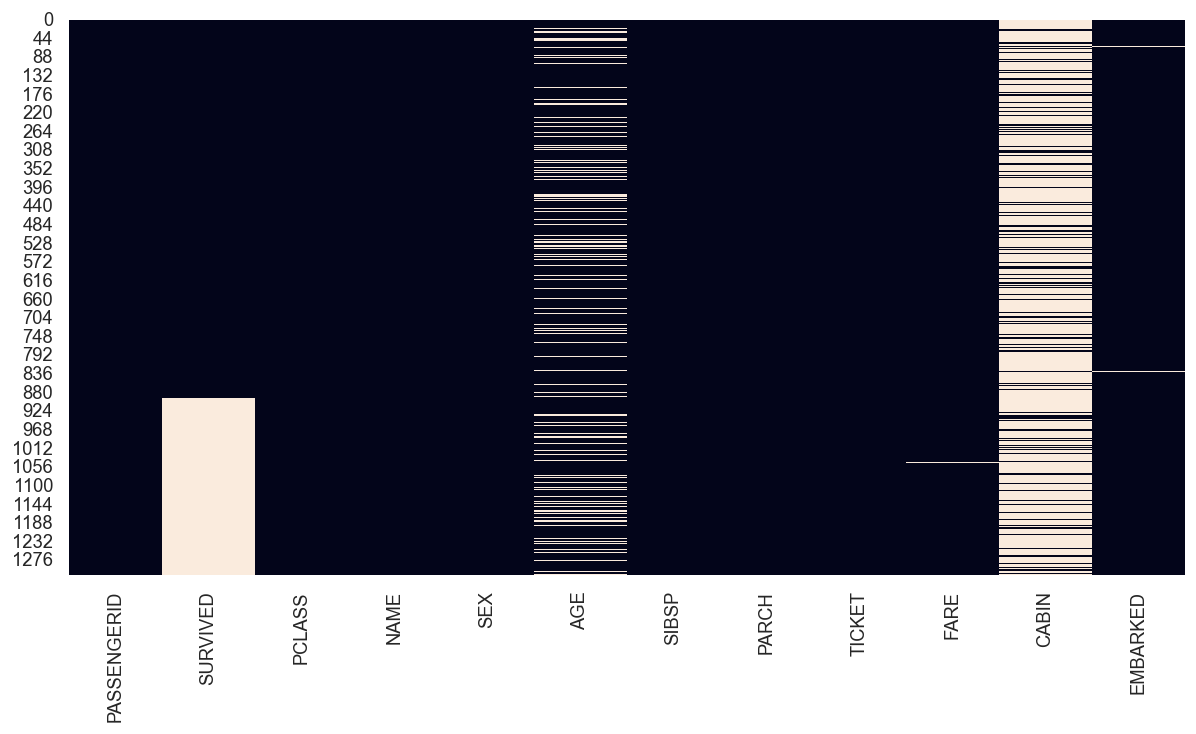

In [45]:

#让我们把数据集中的缺失值可视化吧

sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(train_df.isnull(), cbar=False)
plt.show()

In [46]:
#I change the values that are Nan in the cabin variable to Missing. 
#Thus, I will be able to make meaningful inferences in the following stages.

print(train_df['CABIN'].isnull().sum())
train_df['CABIN'] = train_df['CABIN'].fillna('Missing')
print(train_df['CABIN'].isnull().sum())

1014
0


In [51]:


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    '''
    从dataframe的中选出那些至少有一个缺失值的列,并将这些列的名称存储在列表 na_columns 中。
    
    首先遍历数据框中的每一列，用 .isnull() 检查该列是否包含缺失值。.isnull() 方法返回一个布尔类型的 Series,其中
    包含与原始 Series 相同的索引，但对于原始 Series 中缺失的值，相应位置上的值为 True。接下来,使用 .sum() 方法计
    算每列的缺失值数量，并检查其是否大于 0。如果某个列中至少存在一个缺失值,则将其列名添加到列表na_columns 中。
    '''
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    #按降序缺失值的数量排列列名储存到n_miss里
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    #缺失列的缺失总量/行数*100，降序排列
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    #missing_df是n_miss和ratio（保留两位小数）按列方向拼接到一起
    print(missing_df, end="\n")

    if na_name:
        return na_columns


# Let's observe the effect of missing values on survival rate.
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


        
        
# Detailed examination of Missing Values
na_cols = missing_values_table(train_df, True)
print('-----------------------------------------------------------------------------')

# Examining the Relationship of Missing Values with the Dependent Variable
missing_vs_target(train_df, "SURVIVED", na_cols)



          n_miss  ratio
SURVIVED     418 31.930
AGE          263 20.090
EMBARKED       2  0.150
FARE           1  0.080
-----------------------------------------------------------------------------
                  TARGET_MEAN  Count
SURVIVED_NA_FLAG                    
0                       0.384    891
1                         NaN      0


             TARGET_MEAN  Count
AGE_NA_FLAG                    
0                  0.406    714
1                  0.294    177


              TARGET_MEAN  Count
FARE_NA_FLAG                    
0                   0.384    891
1                     NaN      0


                  TARGET_MEAN  Count
EMBARKED_NA_FLAG                    
0                       0.382    889
1                       1.000      2




In [24]:
#It caught my attention that there were letters at the beginning of the cabin numbers. 
#I'm updating it so that only letters remain. In this case, the missing value will be M.

train_df['CABIN'] = [col.strip()[0] for col in train_df['CABIN']]
train_df['CABIN'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [25]:
train_df.groupby('CABIN')['SURVIVED'].mean()

CABIN
A   0.467
B   0.745
C   0.593
D   0.758
E   0.750
F   0.615
G   0.500
M   0.300
T   0.000
Name: SURVIVED, dtype: float64

In [26]:
#Let's fill in the missing parts of the age variable in the gender division.

train_df.groupby('SEX')['AGE'].mean()

SEX
female   28.687
male     30.585
Name: AGE, dtype: float64

In [27]:
train_df['AGE'].fillna(train_df.groupby('SEX')['AGE'].transform('mean'), inplace=True)
train_df.isnull().sum()

PASSENGERID      0
SURVIVED       418
PCLASS           0
NAME             0
SEX              0
AGE              0
SIBSP            0
PARCH            0
TICKET           0
FARE             1
CABIN            0
EMBARKED         2
dtype: int64

In [28]:
train_df['EMBARKED'].value_counts()

EMBARKED
S    914
C    270
Q    123
Name: count, dtype: int64

In [29]:
x=train_df['EMBARKED'].mode()[0]
train_df['EMBARKED'].fillna(x, inplace=True)
train_df.isnull().sum()

PASSENGERID      0
SURVIVED       418
PCLASS           0
NAME             0
SEX              0
AGE              0
SIBSP            0
PARCH            0
TICKET           0
FARE             1
CABIN            0
EMBARKED         0
dtype: int64

In [30]:
train_df["FARE"] = train_df["FARE"].fillna(np.mean(train_df[train_df["PCLASS"] == 3]["FARE"]))
train_df.isnull().sum()

PASSENGERID      0
SURVIVED       418
PCLASS           0
NAME             0
SEX              0
AGE              0
SIBSP            0
PARCH            0
TICKET           0
FARE             0
CABIN            0
EMBARKED         0
dtype: int64


<div style="color:#00425A;font-size:30px;font-family:Georgia;text-align:center;">EDA  </div>

In [31]:
# Let's analyze the variables according to its dtypes.
def grab_col_names(dataframe, cat_th=10, car_th=20):
 
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(train_df)

# I'm subtracting PASSENGERID from num_cols.
num_cols = [col for col in num_cols if col not in "PASSENGERID"]



Observations: 1309
Variables: 12
cat_cols: 7
num_cols: 3
cat_but_car: 2
num_but_cat: 4


<a id = "3"></a>
<div style="color:#00425A;font-size:25px;font-family:Georgia;">EDA for cat_cols </div>

In [32]:
cat_cols

['SEX', 'CABIN', 'EMBARKED', 'SURVIVED', 'PCLASS', 'SIBSP', 'PARCH']

<Axes: xlabel='PARCH', ylabel='count'>

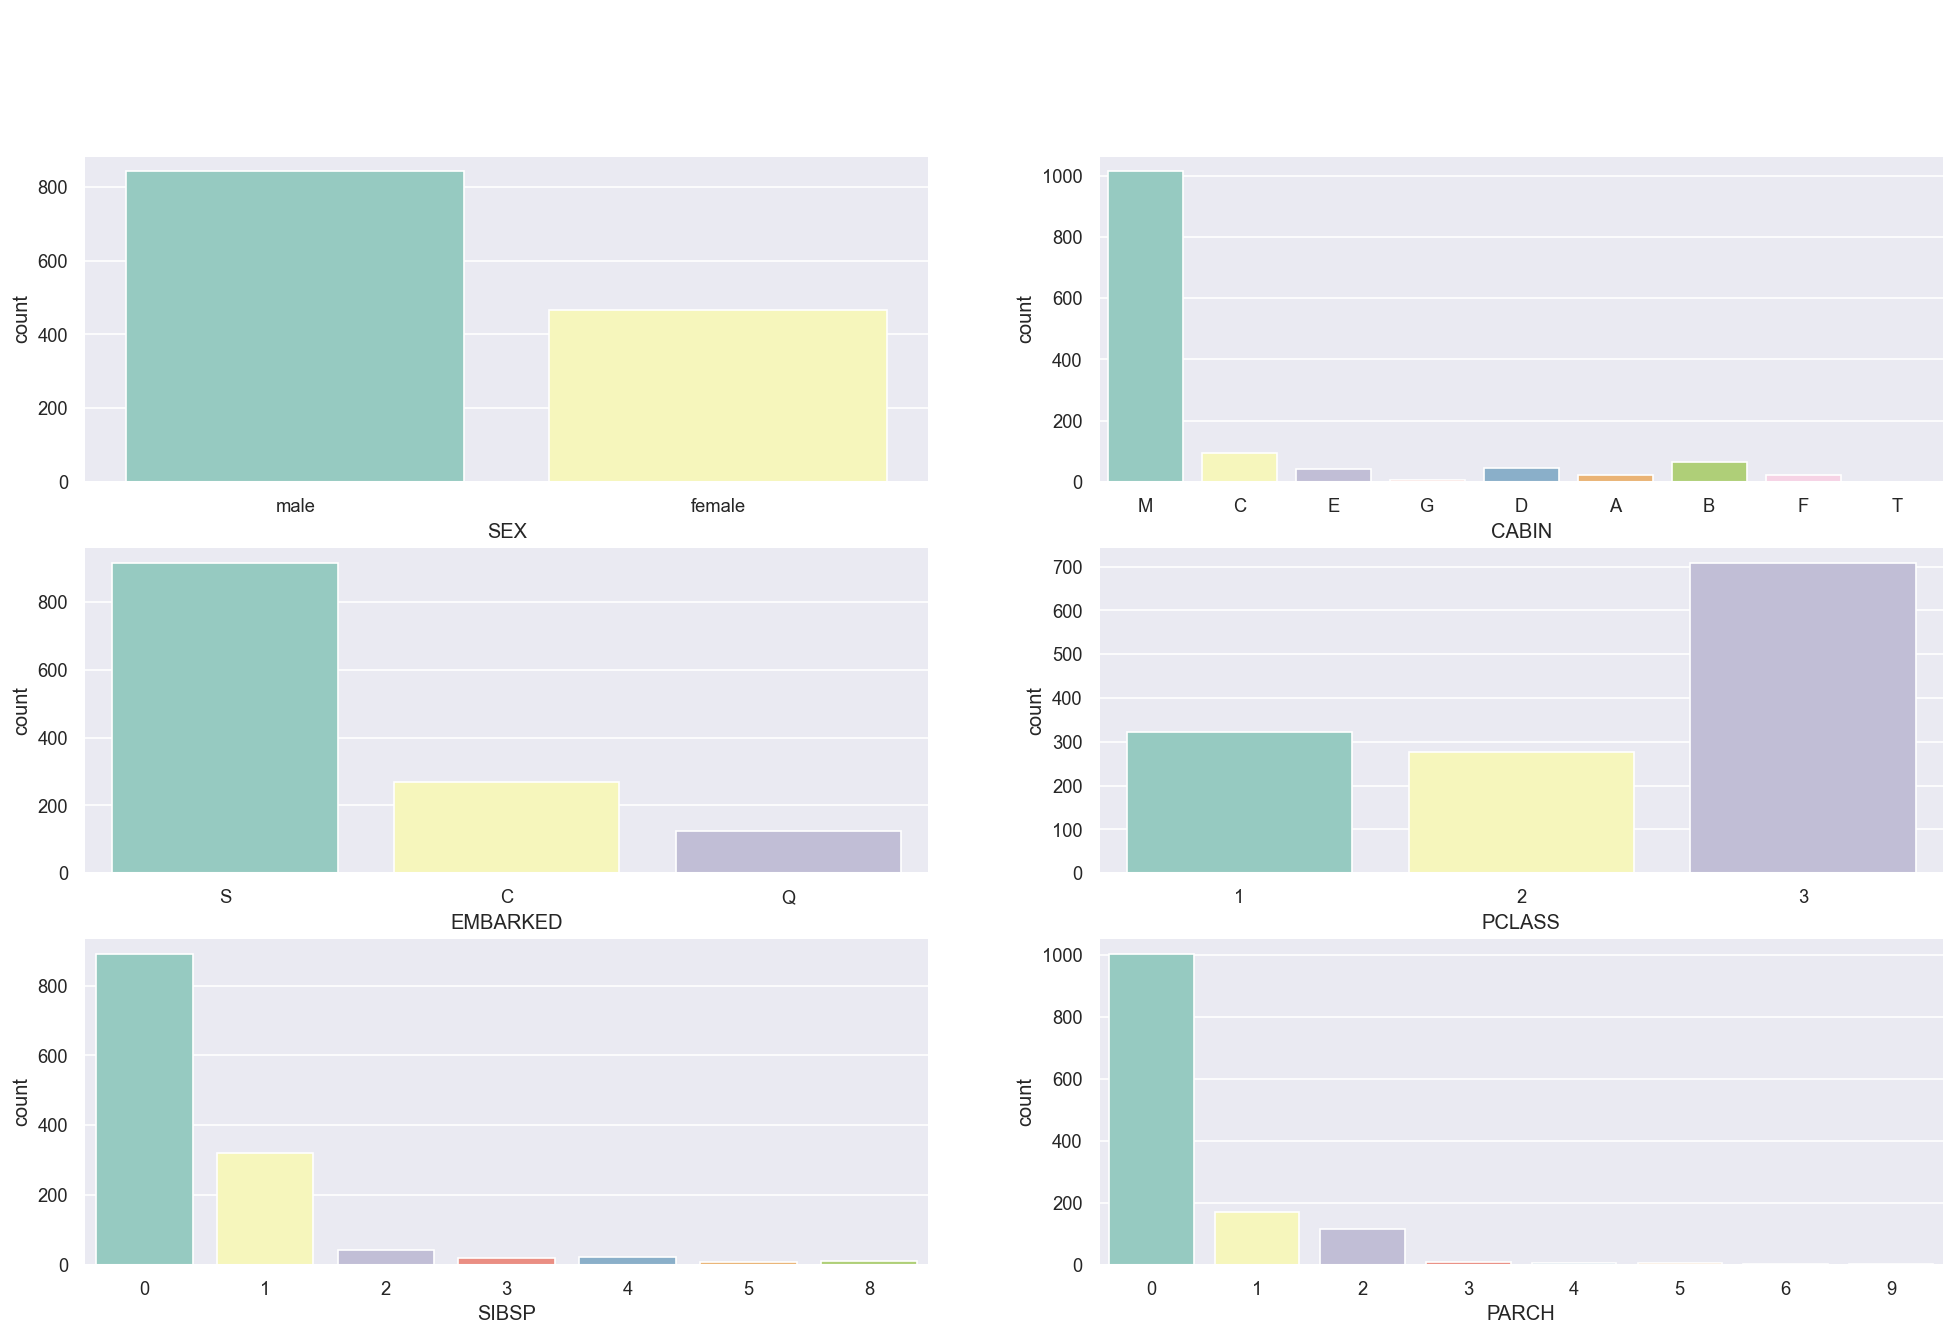

In [33]:
fig, axes = plt.subplots(3,2, figsize=(20,12)) 

axes = axes.flatten()
fig.suptitle("cat_cols", weight='bold', color="white", fontsize=16)
fig.set_facecolor("white")


sns.countplot(x=train_df['SEX'], palette='Set3', ax=axes[0])

sns.countplot(x=train_df['CABIN'], palette='Set3', ax=axes[1])

sns.countplot(x=train_df['EMBARKED'], palette='Set3', ax=axes[2])

sns.countplot(x=train_df['PCLASS'], palette='Set3', ax=axes[3])

sns.countplot(x=train_df['SIBSP'], palette='Set3', ax=axes[4])

sns.countplot(x=train_df['PARCH'], palette='Set3', ax=axes[5])

In [34]:
def analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
        
                   

analyser(train_df, "SURVIVED", cat_cols)

SEX : 2
        COUNT  RATIO  TARGET_MEAN
SEX                              
female    466  0.356        0.742
male      843  0.644        0.189


CABIN : 9
       COUNT  RATIO  TARGET_MEAN
CABIN                           
A         22  0.017        0.467
B         65  0.050        0.745
C         94  0.072        0.593
D         46  0.035        0.758
E         41  0.031        0.750
F         21  0.016        0.615
G          5  0.004        0.500
M       1014  0.775        0.300
T          1  0.001        0.000


EMBARKED : 3
          COUNT  RATIO  TARGET_MEAN
EMBARKED                           
C           270  0.206        0.554
Q           123  0.094        0.390
S           916  0.700        0.339


SURVIVED : 2
          COUNT  RATIO  TARGET_MEAN
SURVIVED                           
0.000       549  0.419        0.000
1.000       342  0.261        1.000


PCLASS : 3
        COUNT  RATIO  TARGET_MEAN
PCLASS                           
1         323  0.247        0.630
2         27

        SEX  Ratio
SEX               
male    843 64.400
female  466 35.600
########################



<Figure size 2400x1800 with 0 Axes>

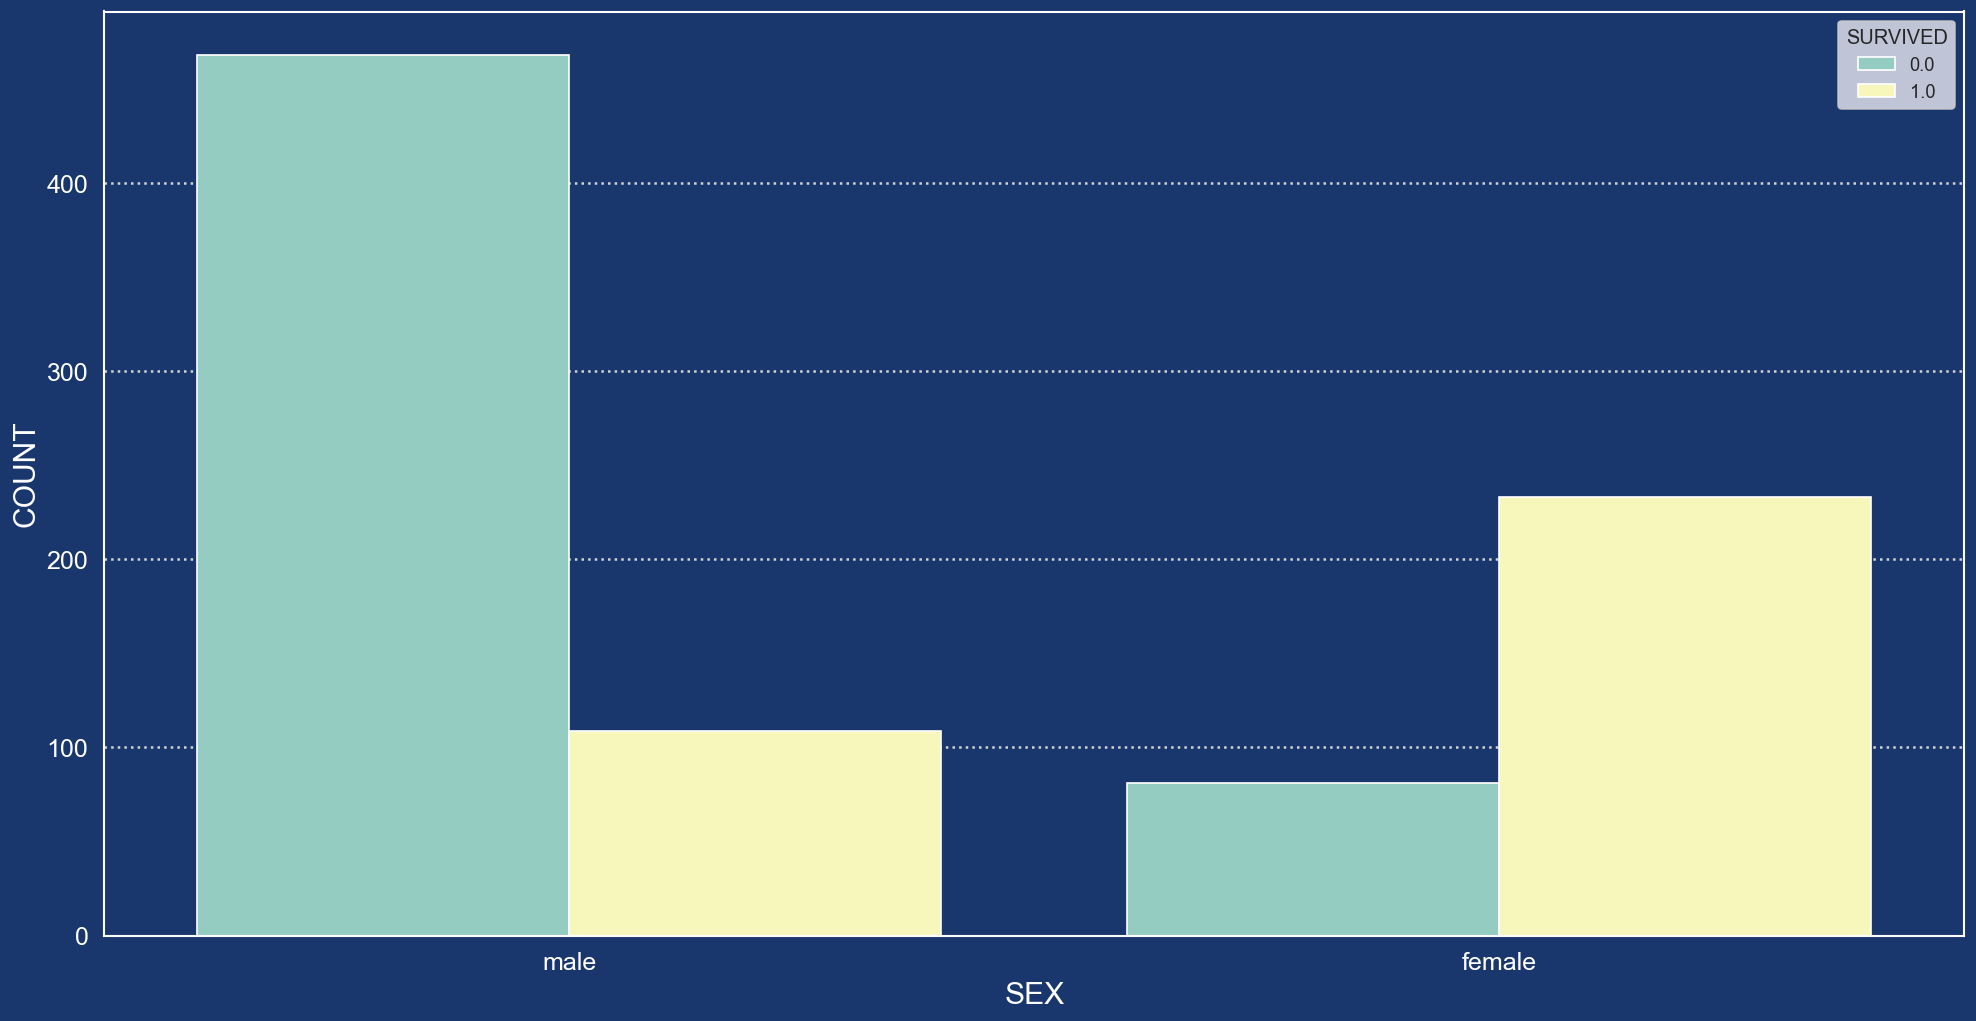

       CABIN  Ratio
CABIN              
M       1014 77.464
C         94  7.181
B         65  4.966
D         46  3.514
E         41  3.132
A         22  1.681
F         21  1.604
G          5  0.382
T          1  0.076
########################



<Figure size 2400x1800 with 0 Axes>

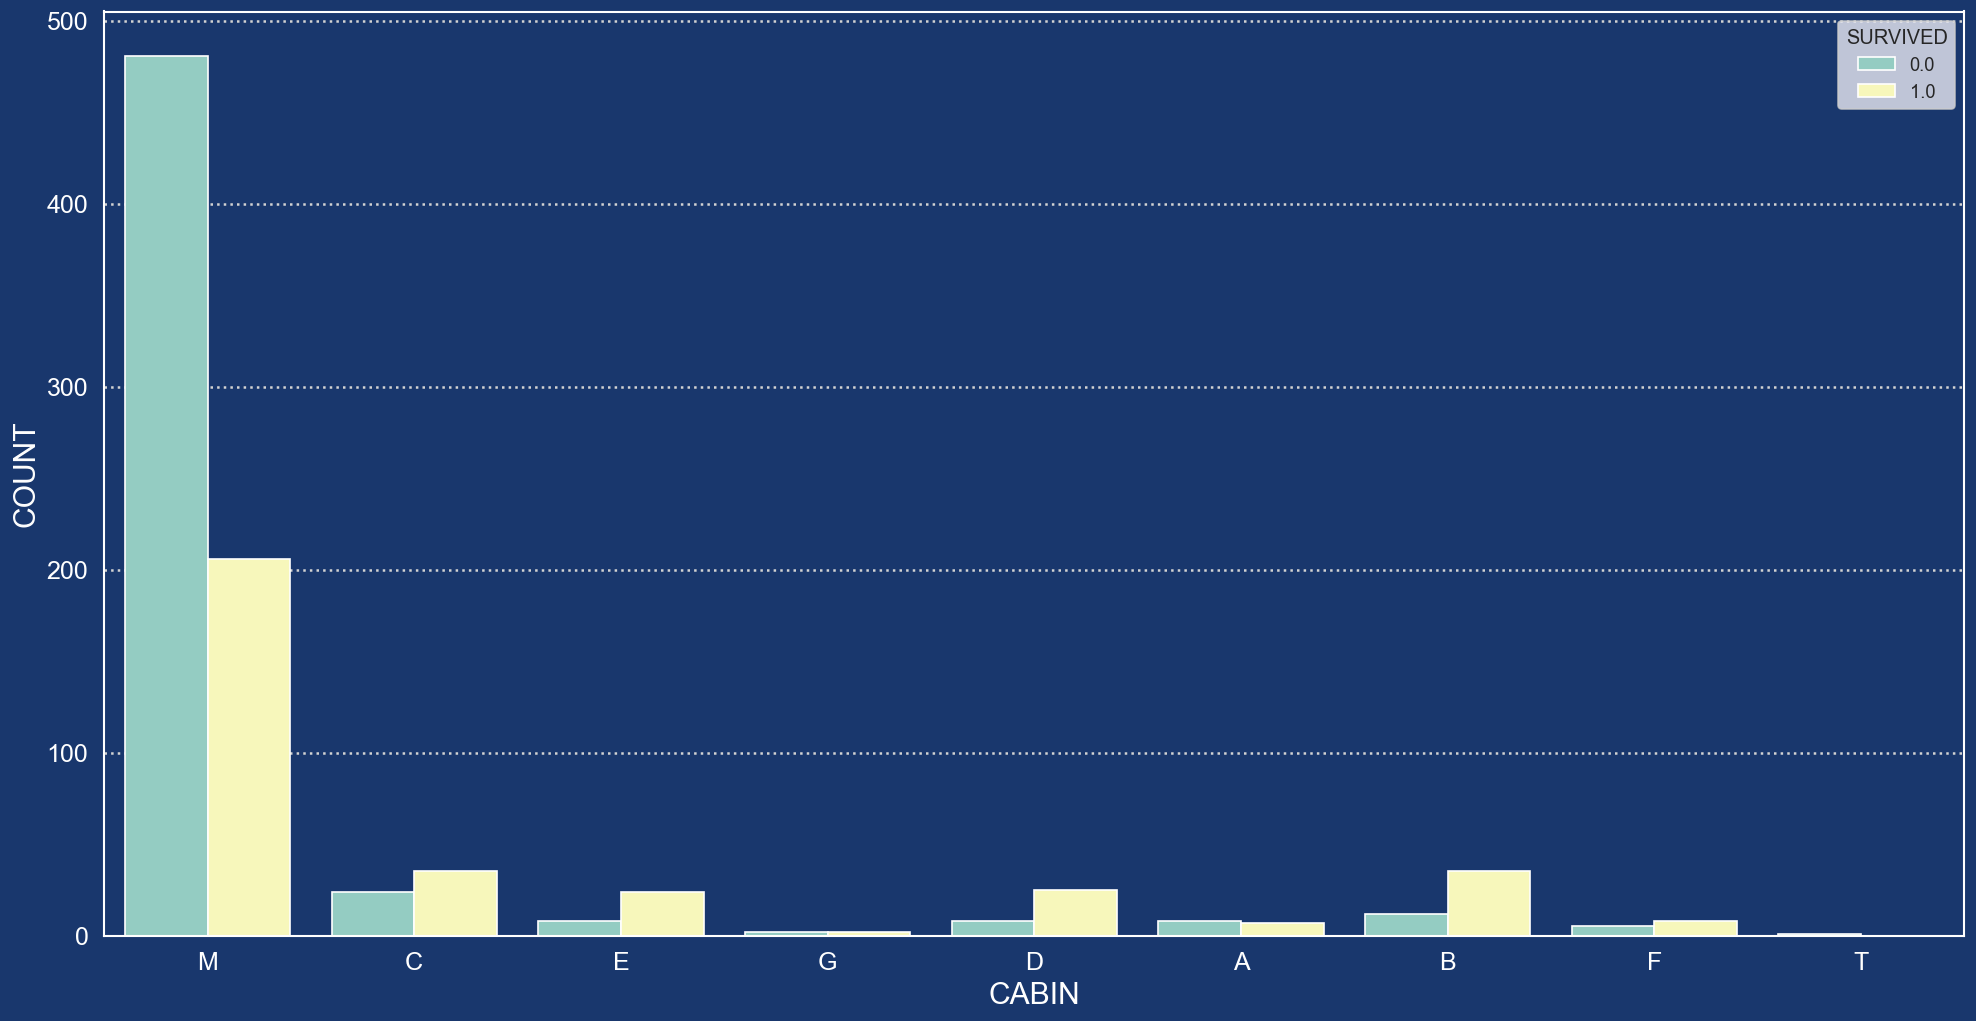

          EMBARKED  Ratio
EMBARKED                 
S              916 69.977
C              270 20.626
Q              123  9.396
########################



<Figure size 2400x1800 with 0 Axes>

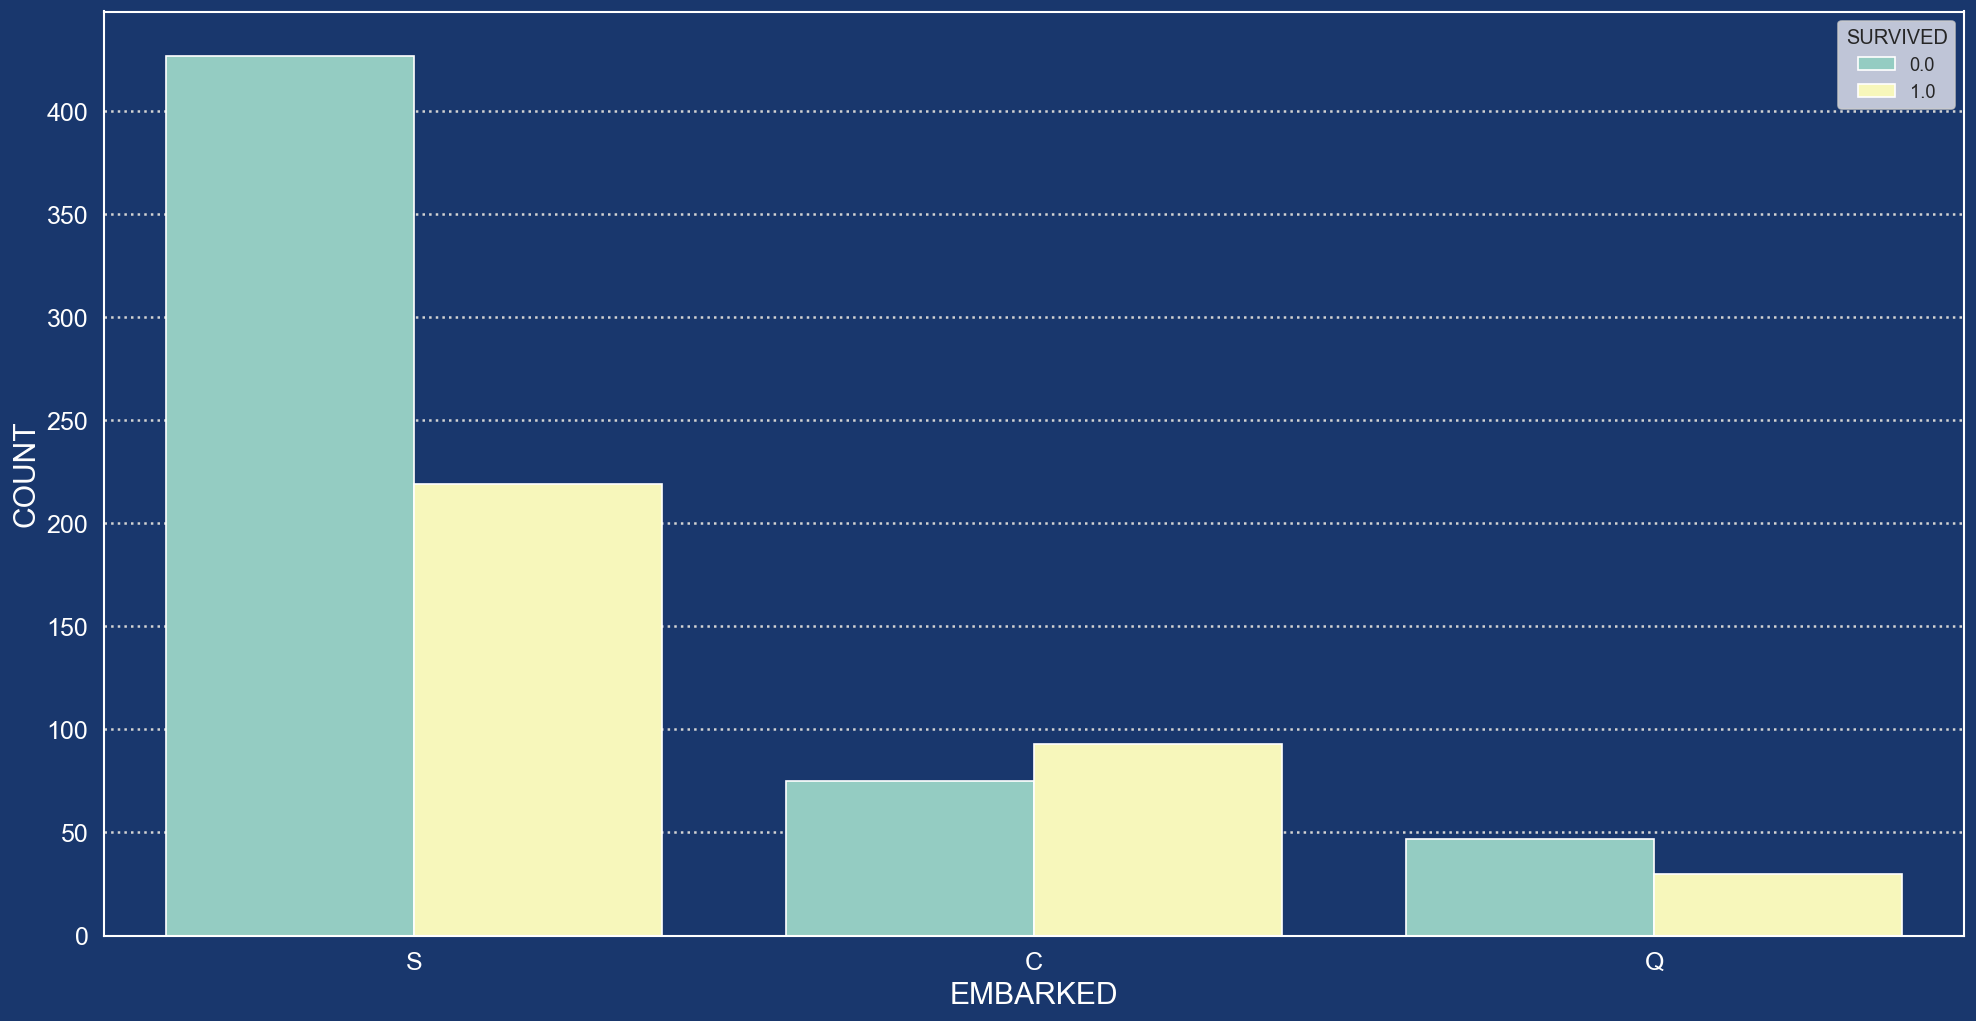

          SURVIVED  Ratio
SURVIVED                 
0.000          549 41.940
1.000          342 26.127
########################



<Figure size 2400x1800 with 0 Axes>

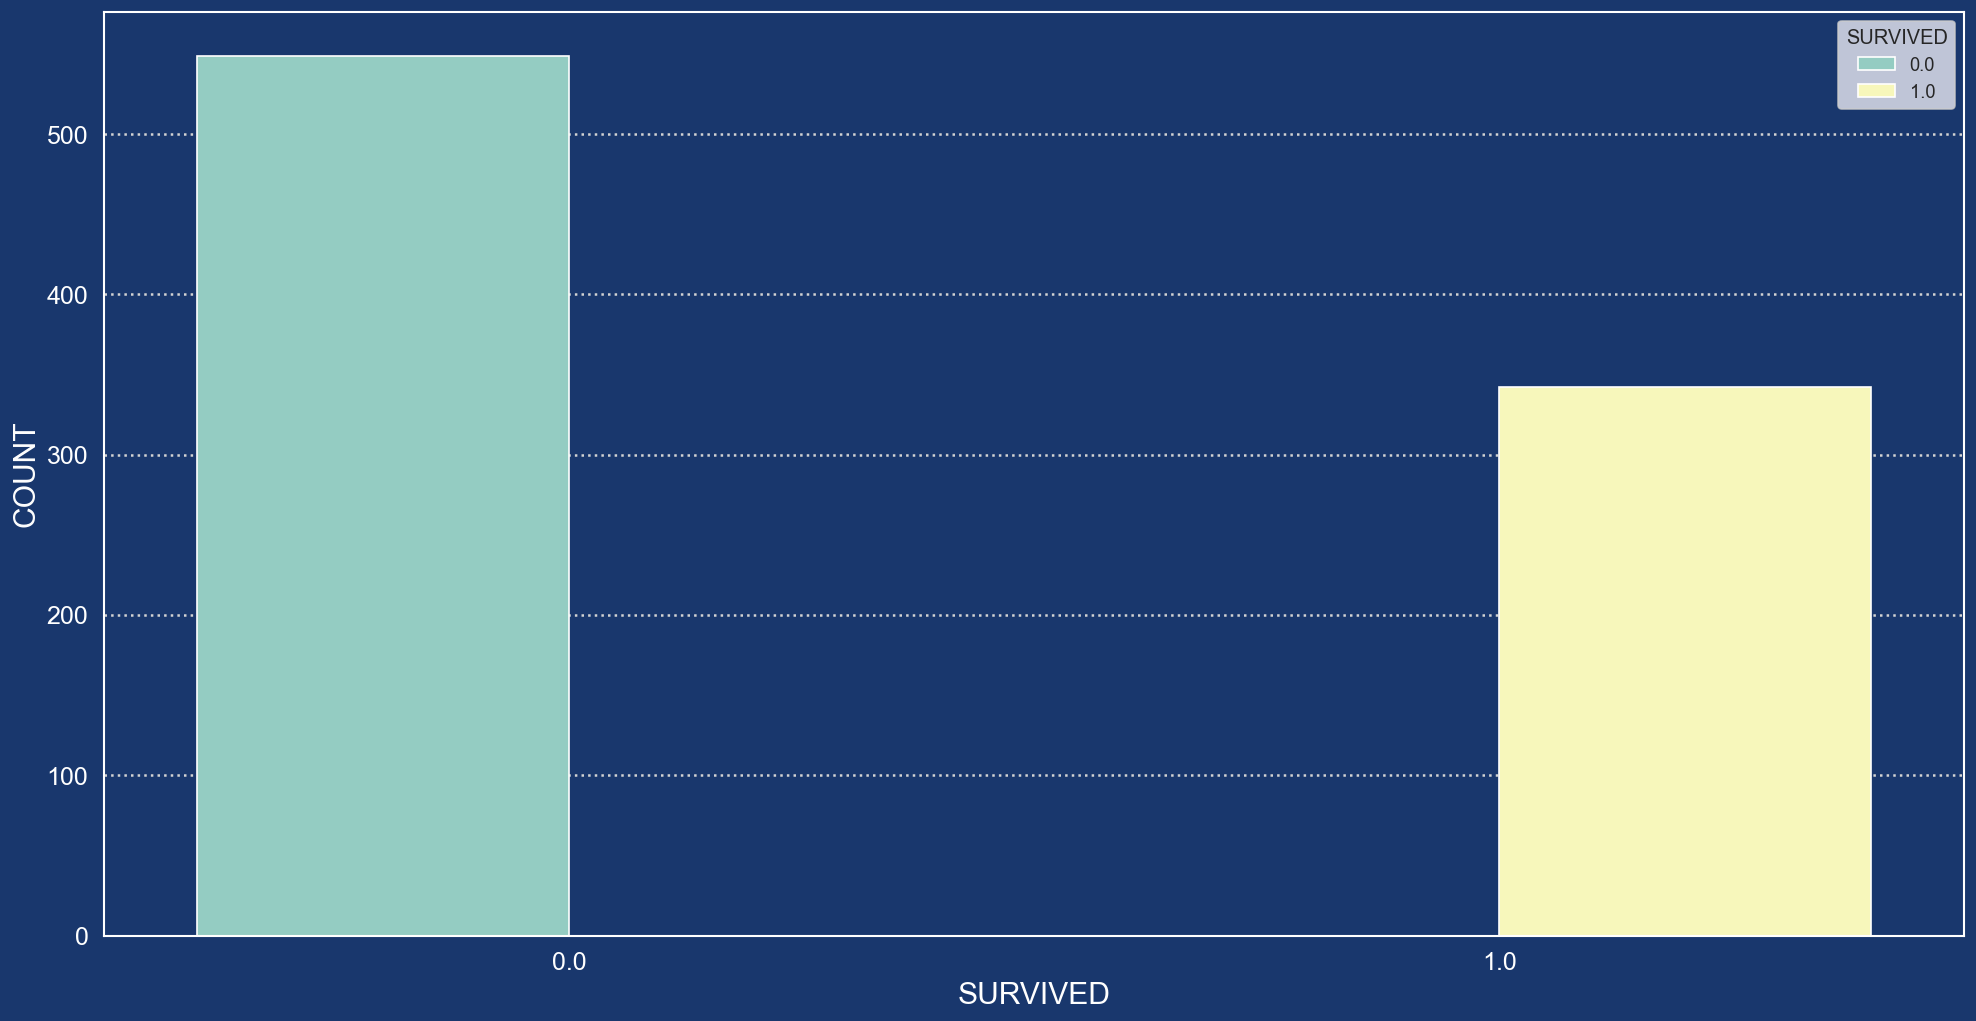

        PCLASS  Ratio
PCLASS               
3          709 54.163
1          323 24.675
2          277 21.161
########################



<Figure size 2400x1800 with 0 Axes>

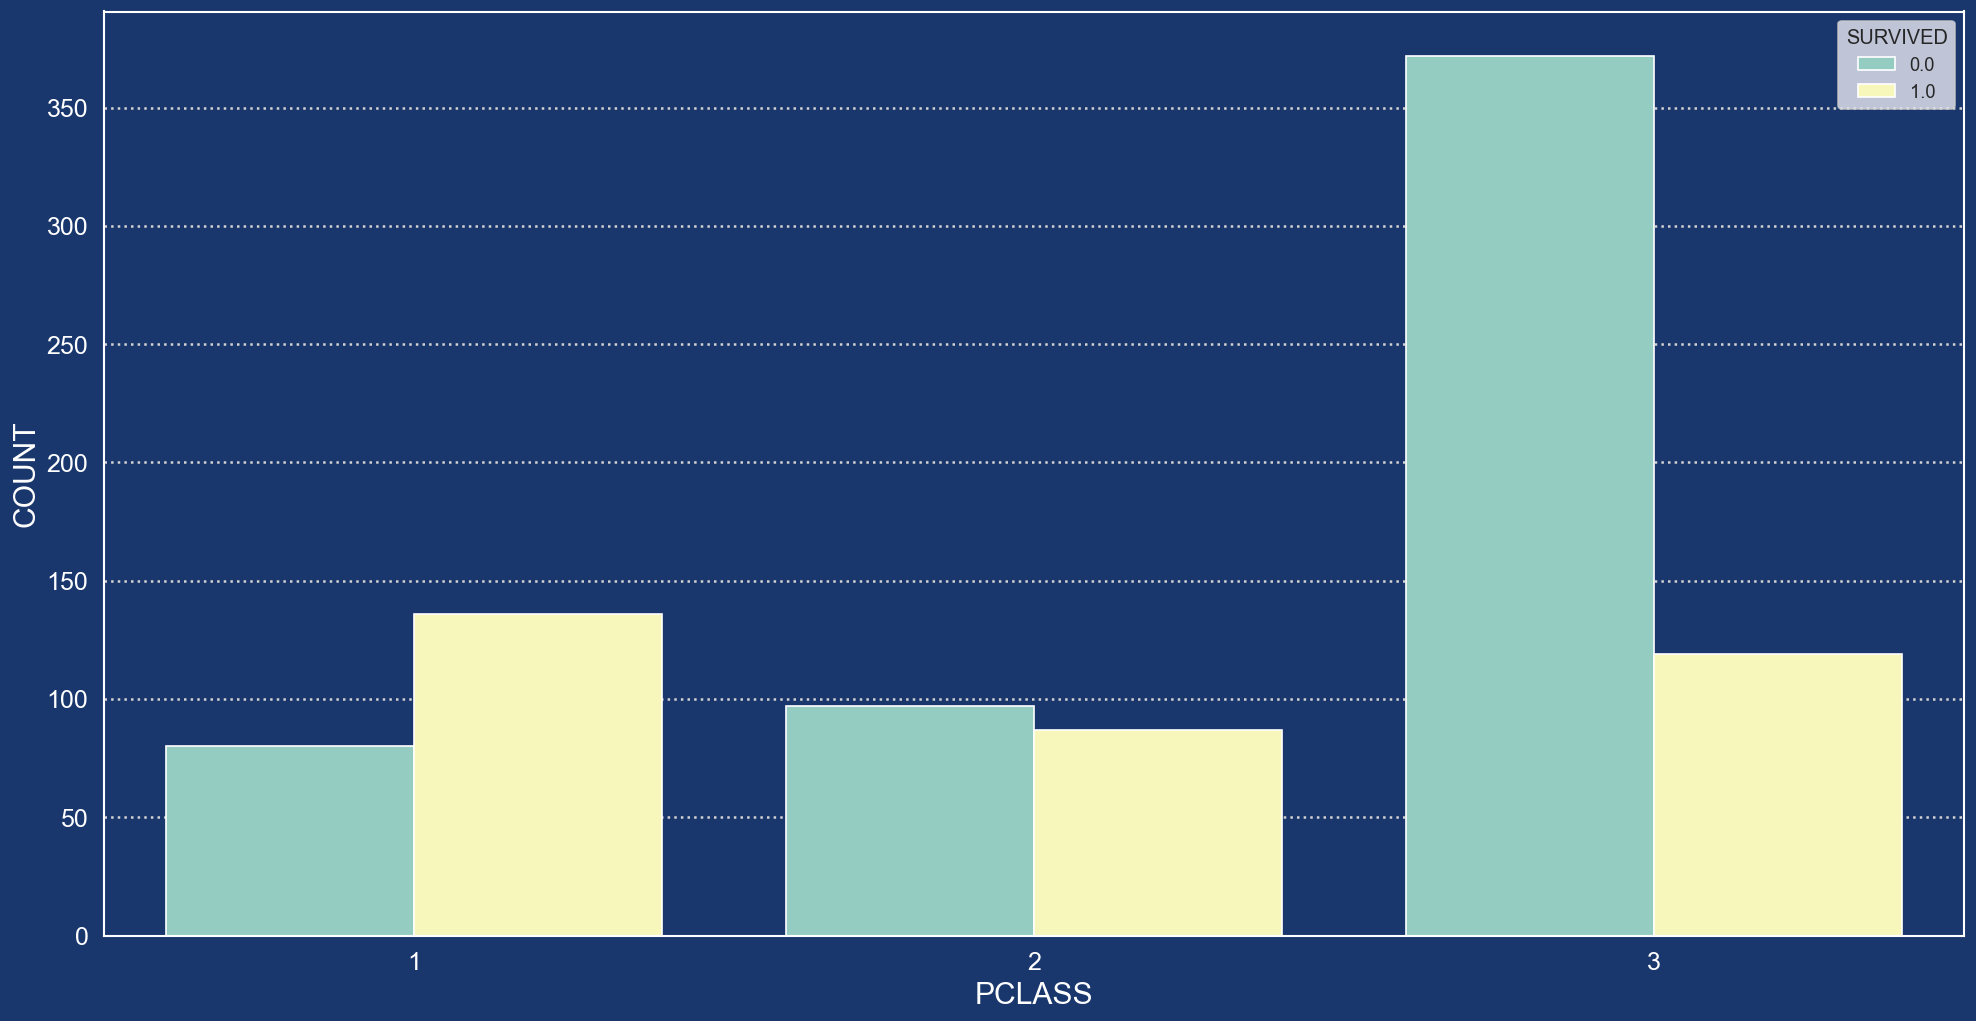

       SIBSP  Ratio
SIBSP              
0        891 68.067
1        319 24.370
2         42  3.209
4         22  1.681
3         20  1.528
8          9  0.688
5          6  0.458
########################



<Figure size 2400x1800 with 0 Axes>

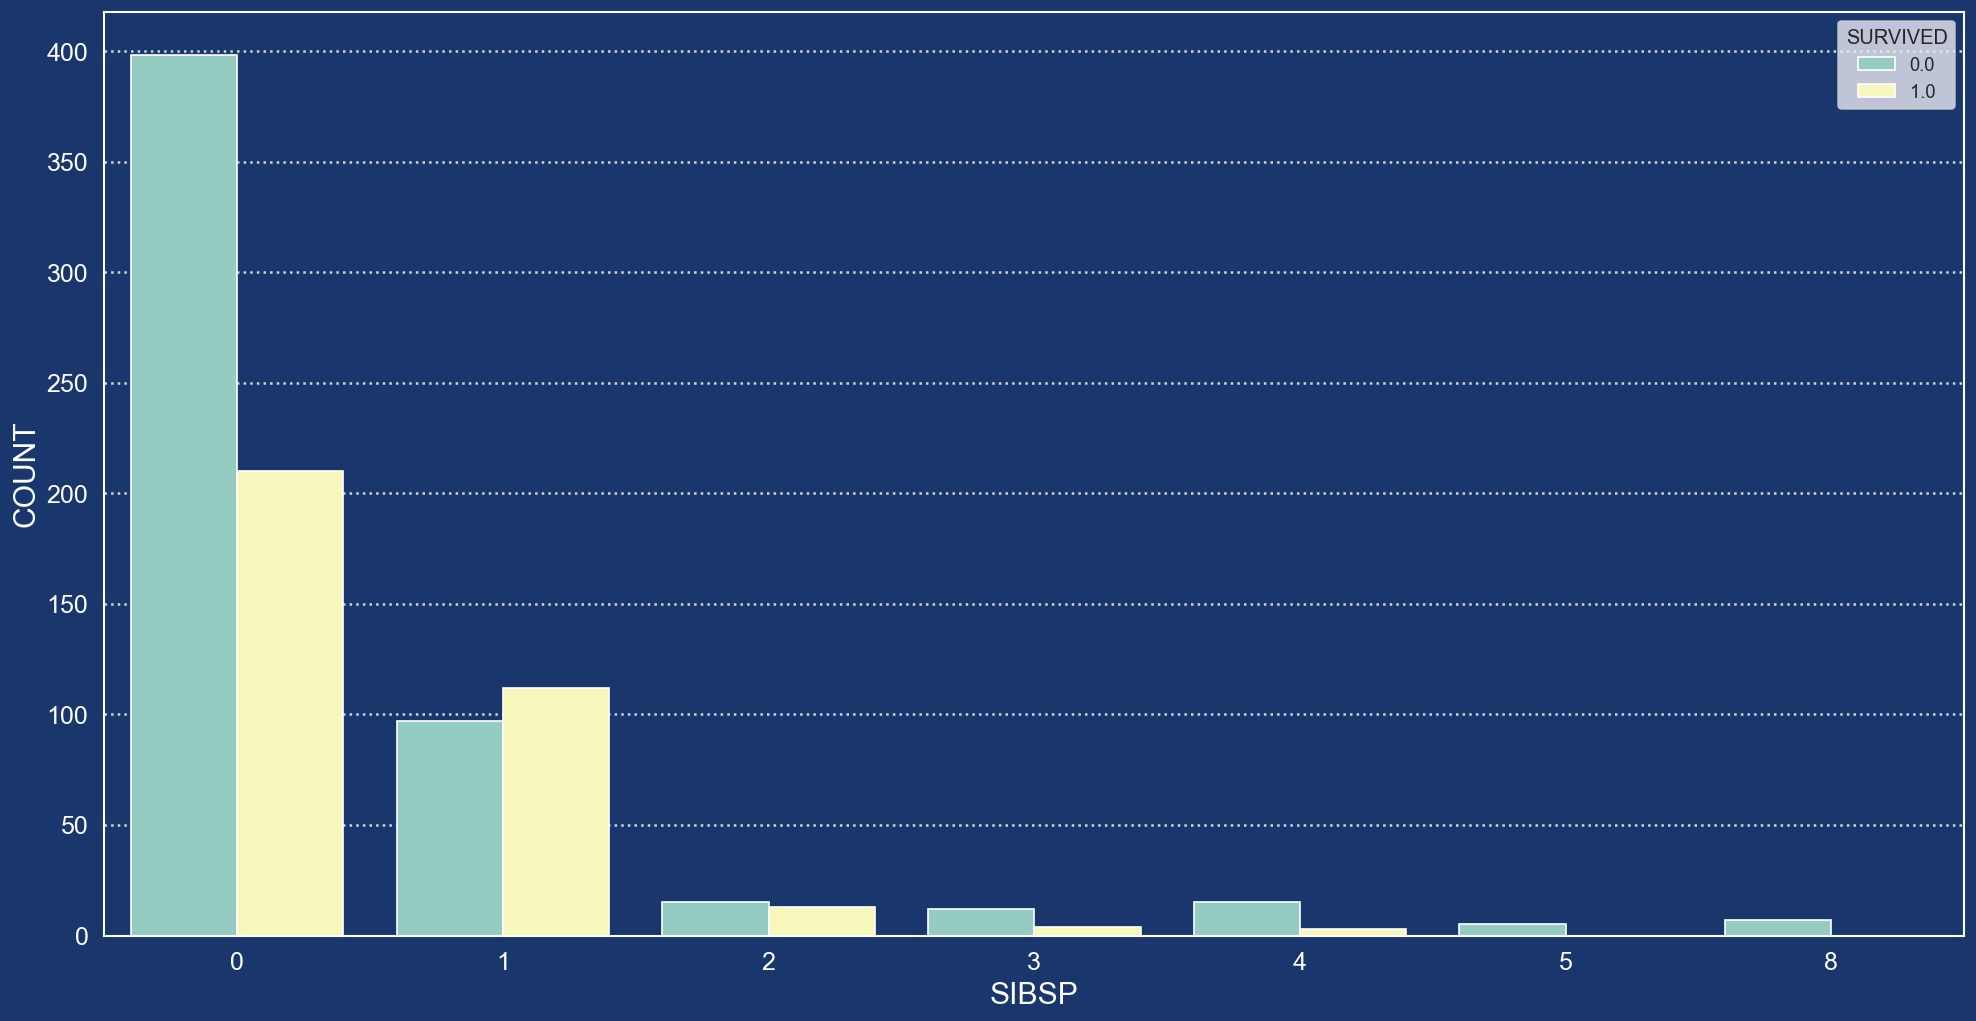

       PARCH  Ratio
PARCH              
0       1002 76.547
1        170 12.987
2        113  8.633
3          8  0.611
5          6  0.458
4          6  0.458
6          2  0.153
9          2  0.153
########################



<Figure size 2400x1800 with 0 Axes>

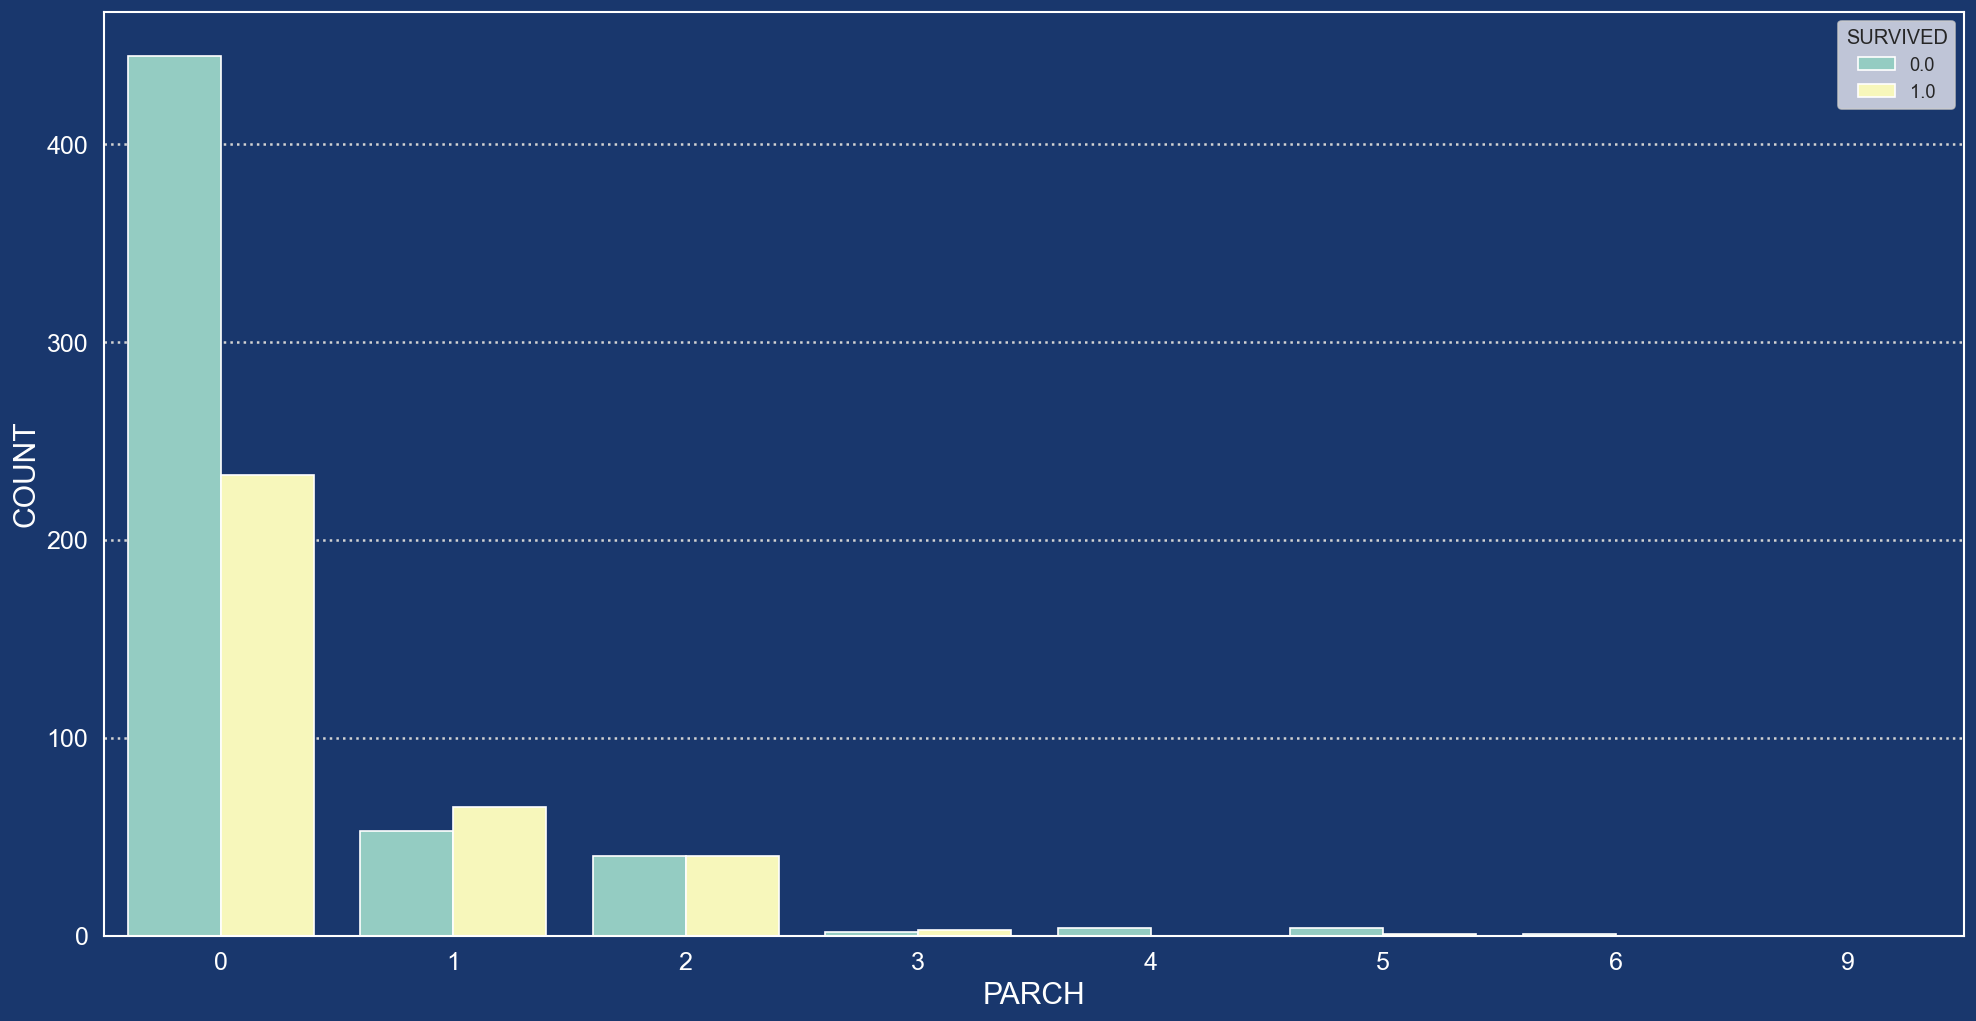

In [35]:
background = "#313332"
backgroundr = "#19376D"
text_color = "w"
title_font="Alegreya Sans"


def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)})),
    print("\033[1m########################\n\033[0m")
    if plot:
        plt.figure(figsize=(20,15))
        fig, ax = plt.subplots(figsize=(20,10))
        ax.patch.set_facecolor(backgroundr)
        fig.set_facecolor(backgroundr)
        fig.facecolor="white"
        fig.edgecolor="white"

        ax.grid(ls="dotted",lw=1.5,color="lightgrey",zorder=0.5)

        sns.countplot(x=dataframe[col_name], data=dataframe, palette='Set3', hue='SURVIVED', saturation=0.8)
        plt.ylabel('COUNT', size = 18,color="white" )
        plt.xlabel(col_name, fontsize = 18,color="white" )
        plt.xticks(size = 15,color="white" )
        plt.yticks(size = 15,color="white" )
        plt.show()
        
        
        
        
for col in cat_cols:
    if train_df[col].dtype == 'bool':
        print('######**BOOL**######')
    else:
        cat_summary(train_df, col, plot=True)

<a id = "4"></a>
<div style="color:#3F497F;font-size:25px;font-family:Georgia;">EDA for num_cols</div>

In [36]:
num_cols

['AGE', 'FARE']

In [37]:


fig = px.histogram(train_df, x='AGE', opacity=1, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Number of ages of passengers', template='ygridoff',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [38]:
fig = px.histogram(train_df, x='FARE', opacity=1, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Amount of money spent on ticket', template='ygridoff',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

<a id = "5"></a>
<div style="color:#3F497F;font-size:30px;font-family:Georgia;text-align:center;">Outliars Detection </div>

In [39]:
# Let's observe the lower and upper values of the outliers in our numerical variables.

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


for col in num_cols:
    print(col, outlier_thresholds(train_df, col))

AGE (2.5, 54.5)
FARE (-27.172999999999995, 66.34379999999999)


In [40]:
# With the x function, we can confirm the existence of outliers in our variables.

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(train_df, col))

AGE True
FARE True


In [41]:
###################
# Let us access the observations of outliers.
###################

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index
    
for col in num_cols:
    print(col, grab_outliers(train_df, col))

    PASSENGERID  SURVIVED  PCLASS                              NAME     SEX    AGE  SIBSP  PARCH      TICKET   FARE CABIN EMBARKED
7             8     0.000       3    Palsson, Master. Gosta Leonard    male  2.000      3      1      349909 21.075     M        S
11           12     1.000       1          Bonnell, Miss. Elizabeth  female 58.000      0      0      113783 26.550     C        S
15           16     1.000       2  Hewlett, Mrs. (Mary D Kingcome)   female 55.000      0      0      248706 16.000     M        S
16           17     0.000       3              Rice, Master. Eugene    male  2.000      4      1      382652 29.125     M        Q
33           34     0.000       2             Wheadon, Mr. Edward H    male 66.000      0      0  C.A. 24579 10.500     M        S
AGE None
    PASSENGERID  SURVIVED  PCLASS                                               NAME     SEX    AGE  SIBSP  PARCH    TICKET    FARE CABIN EMBARKED
1             2     1.000       1  Cumings, Mrs. John Brad

In [42]:
# We suppress our outliers with the 'replace_with_thresholds' function.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(train_df, col)
    
# When we check for outliers with the y function, we observe the result.   
for col in num_cols:
    print(col, check_outlier(train_df, col))

AGE False
FARE False


<div style="color:#3F497F;font-size:30px;font-family:Georgia;text-align:center;">After Outlier Operation </div>

In [43]:

fig = px.histogram(train_df, x='AGE', opacity=1, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Number of ages of passengers', template='ygridoff',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [44]:
fig = px.histogram(train_df, x='FARE', opacity=1, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Amount of money spent on ticket', template='ygridoff',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

<div style="color:#3F497F;font-size:30px;font-family:Georgia;text-align:center;">Feature Extractions </div>
<a id = "6"></a>


In [45]:
###################
# Letter Count
###################

train_df["NEW_NAME_COUNT"] = train_df["NAME"].str.len()

###################
# Word Count
###################

train_df["NEW_NAME_WORD_COUNT"] = train_df["NAME"].apply(lambda x: len(str(x).split(" ")))

train_df["NEW_FAMILY_SIZE"] = train_df["SIBSP"] + train_df["PARCH"] + 1

train_df["NEW_AGE_PCLASS"] = train_df["AGE"] * train_df["PCLASS"]


train_df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_FAMILY_SIZE,NEW_AGE_PCLASS
0,1,0.000,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,M,S,23,4,2,66.000
1,2,1.000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,66.344,C,C,51,7,2,38.000
2,3,1.000,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,M,S,22,3,1,78.000
3,4,1.000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C,S,44,7,2,35.000
4,5,0.000,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,M,S,24,4,1,105.000


<Figure size 2400x1800 with 0 Axes>

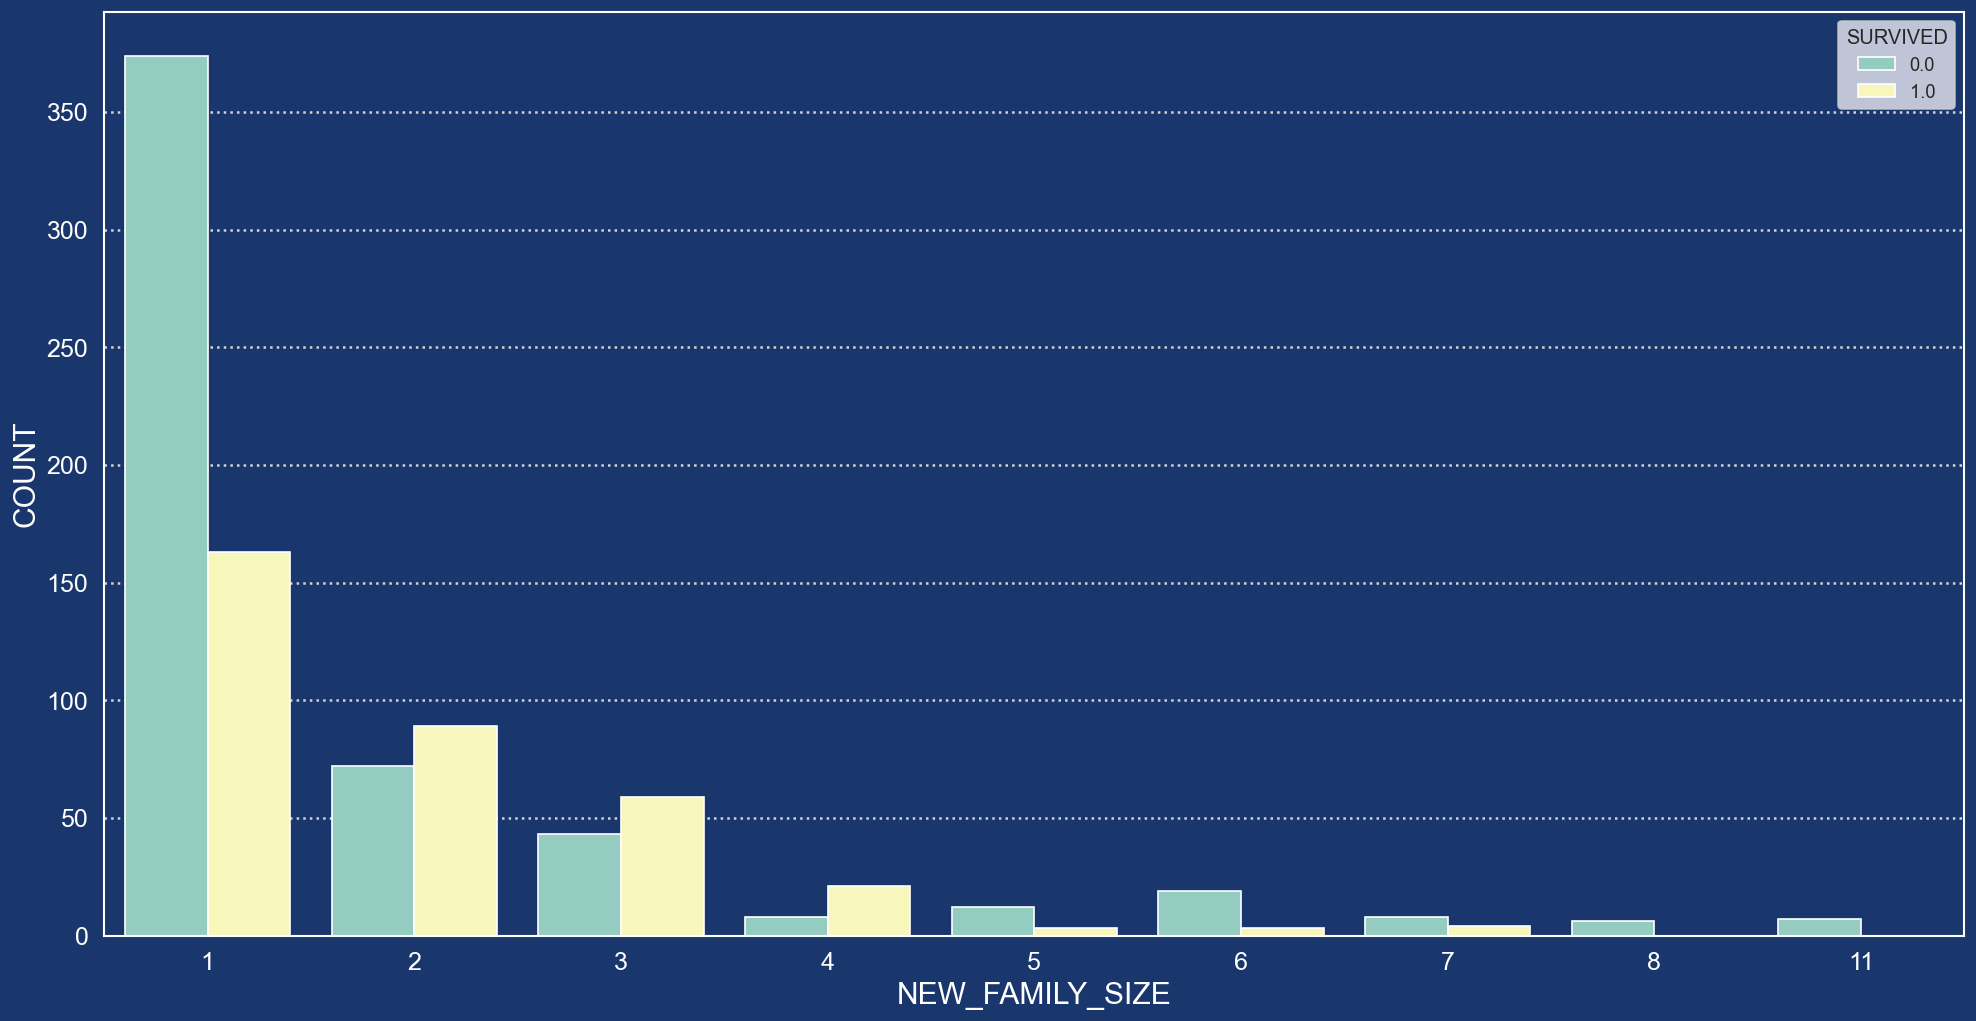

In [46]:

plt.figure(figsize=(20,15))
fig, ax = plt.subplots(figsize=(20,10))
ax.patch.set_facecolor(backgroundr)
fig.set_facecolor(backgroundr)
fig.facecolor="white"
fig.edgecolor="white"

ax.grid(ls="dotted",lw=1.5,color="lightgrey",zorder=0.5)

sns.countplot(x='NEW_FAMILY_SIZE', data=train_df, palette='Set3', hue='SURVIVED', saturation=0.8)
plt.ylabel('COUNT', size = 18,color="white" )
plt.xlabel('NEW_FAMILY_SIZE', fontsize = 18,color="white" )
plt.xticks(size = 15,color="white" )
plt.yticks(size = 15,color="white" )
plt.show()
        

In [47]:
# Let's derive the attribute from the name line using regex.
train_df['NEW_TITLE'] = train_df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)


train_df[["NEW_TITLE", "SURVIVED", "AGE"]].groupby(["NEW_TITLE"]).agg({"SURVIVED": "mean", "AGE": ["count", "mean"]})


SURVIVED   AGE       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 54.500
Col          0.500     4 52.250
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dona           NaN     1 39.000
Dr           0.429     8 41.948
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    61  9.175
Miss         0.698   260 23.115
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   757 31.454
Mrs          0.792   197 35.325
Ms           1.000     2 28.344
Rev          0.000     8 40.938
Sir          1.000     1 49.000

<Figure size 2400x1800 with 0 Axes>

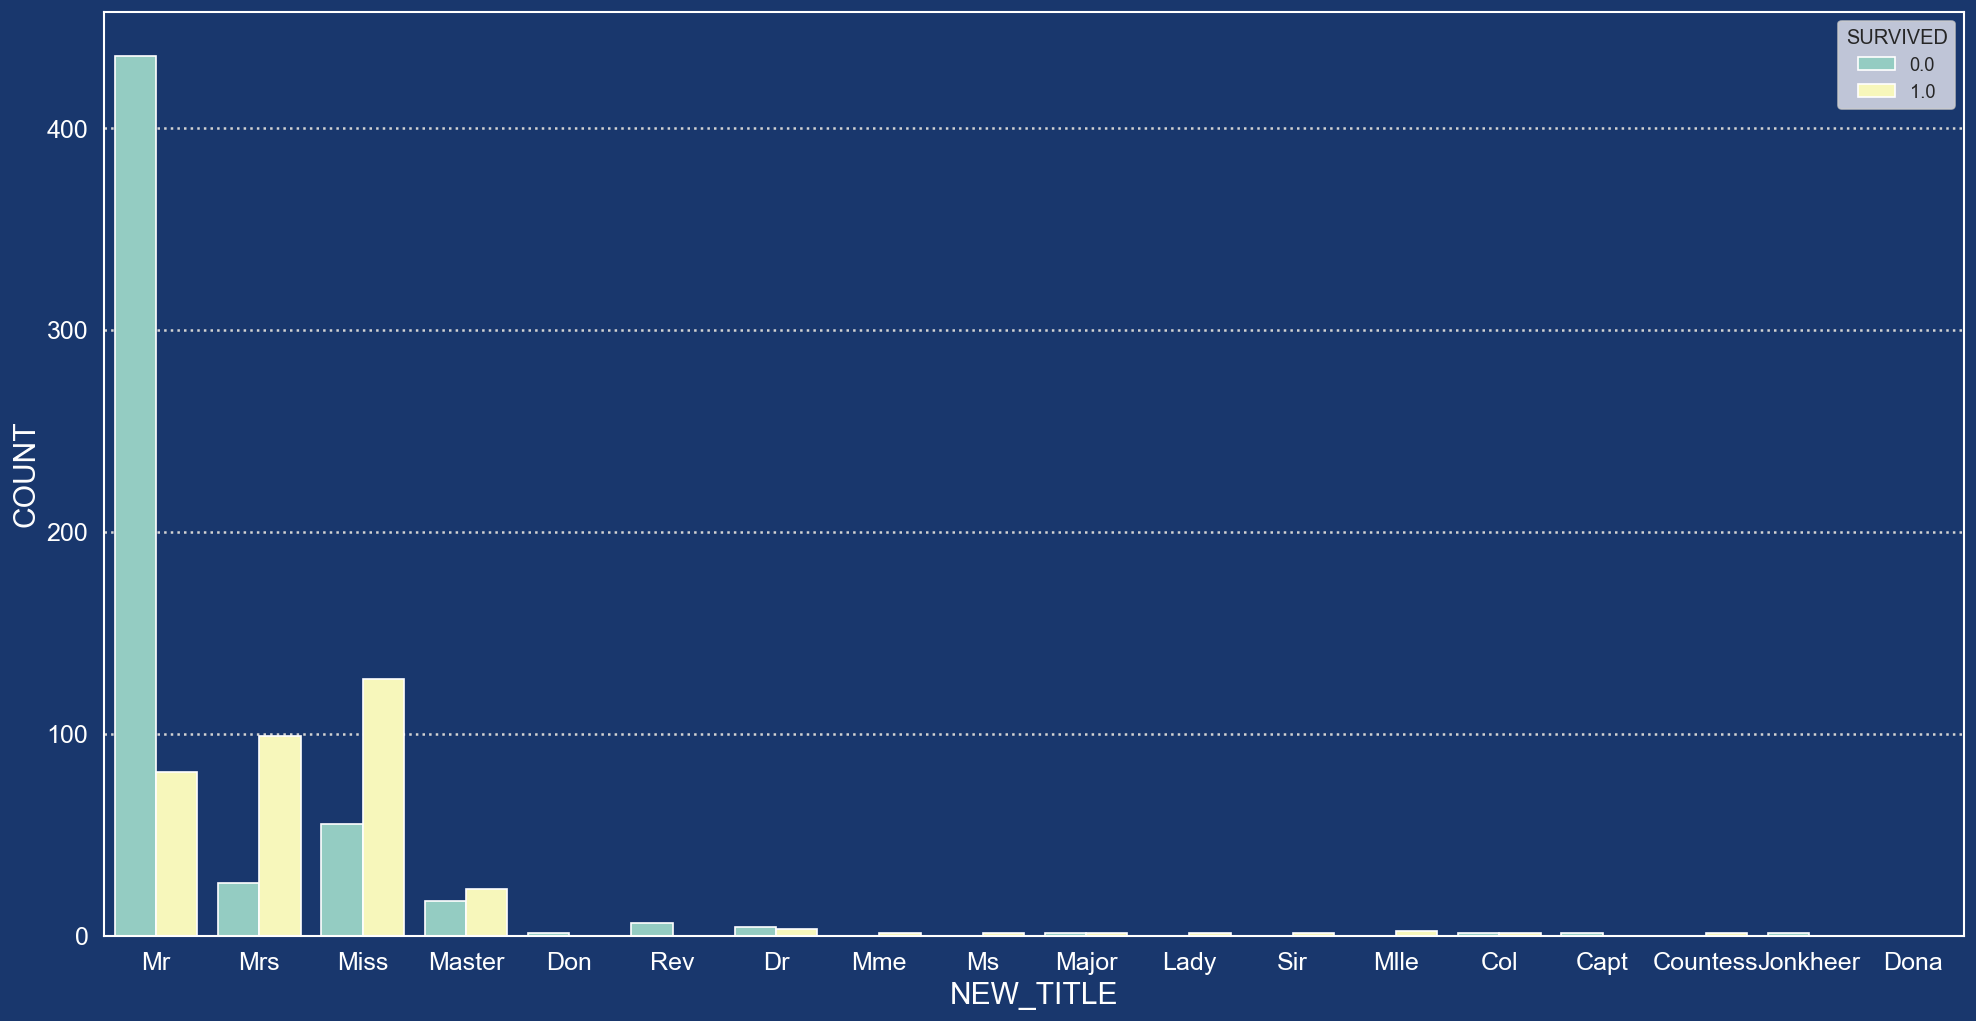

In [48]:
plt.figure(figsize=(20,15))
fig, ax = plt.subplots(figsize=(20,10))
ax.patch.set_facecolor(backgroundr)
fig.set_facecolor(backgroundr)
fig.facecolor="white"
fig.edgecolor="white"

ax.grid(ls="dotted",lw=1.5,color="lightgrey",zorder=0.5)

sns.countplot(x='NEW_TITLE', data=train_df, palette='Set3', hue='SURVIVED', saturation=0.8)
plt.ylabel('COUNT', size = 18,color="white" )
plt.xlabel('NEW_TITLE', fontsize = 18,color="white" )
plt.xticks(size = 15,color="white" )
plt.yticks(size = 15,color="white" )
plt.show()
        

In [49]:
train_df.loc[(train_df['SEX'] == 'male') & (train_df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'

train_df.loc[(train_df['SEX'] == 'male') & (train_df['AGE'] > 21) & (train_df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'

train_df.loc[(train_df['SEX'] == 'male') & (train_df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'

train_df.loc[(train_df['SEX'] == 'female') & (train_df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'

train_df.loc[(train_df['SEX'] == 'female') & (train_df['AGE'] > 21) & (train_df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'

train_df.loc[(train_df['SEX'] == 'female') & (train_df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'


train_df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_TITLE,NEW_SEX_CAT
0,1,0.000,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,M,S,23,4,2,66.000,Mr,maturemale
1,2,1.000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,66.344,C,C,51,7,2,38.000,Mrs,maturefemale
2,3,1.000,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,M,S,22,3,1,78.000,Miss,maturefemale
3,4,1.000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C,S,44,7,2,35.000,Mrs,maturefemale
4,5,0.000,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,M,S,24,4,1,105.000,Mr,maturemale


<Figure size 2400x1800 with 0 Axes>

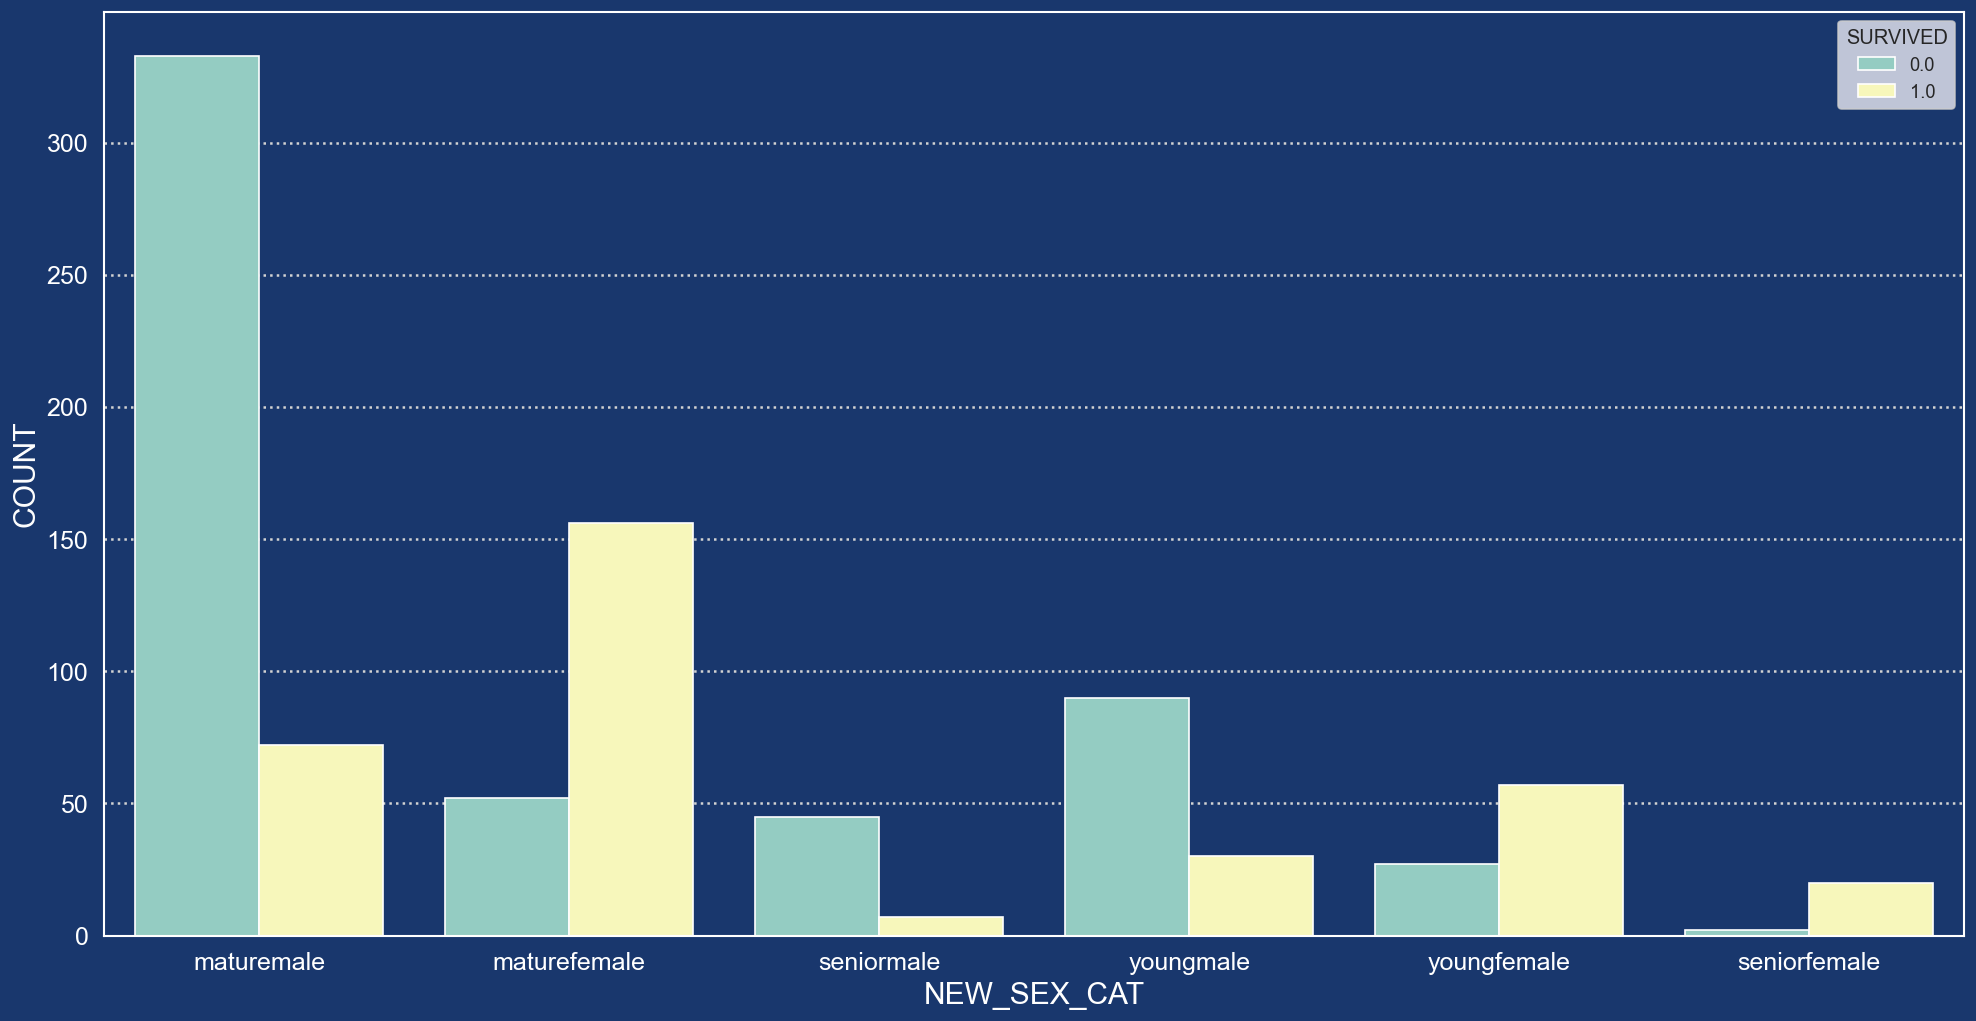

In [50]:
plt.figure(figsize=(20,15))
fig, ax = plt.subplots(figsize=(20,10))
ax.patch.set_facecolor(backgroundr)
fig.set_facecolor(backgroundr)
fig.facecolor="white"
fig.edgecolor="white"

ax.grid(ls="dotted",lw=1.5,color="lightgrey",zorder=0.5)

sns.countplot(x='NEW_SEX_CAT', data=train_df, palette='Set3', hue='SURVIVED', saturation=0.8)
plt.ylabel('COUNT', size = 18,color="white" )
plt.xlabel('NEW_SEX_CAT', fontsize = 18,color="white" )
plt.xticks(size = 15,color="white" )
plt.yticks(size = 15,color="white" )
plt.show()

In [51]:
fig = px.histogram(train_df, x='NEW_NAME_WORD_COUNT', opacity=1, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Amount of money spent on ticket', template='ygridoff',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [52]:
# Let's analyze the variables according to its dtypes.
def grab_col_names(dataframe, cat_th=10, car_th=20):
 
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(train_df)

# I'm subtracting PASSENGERID from num_cols.
num_cols = [col for col in num_cols if col not in "PASSENGERID"]



Observations: 1309
Variables: 18
cat_cols: 11
num_cols: 5
cat_but_car: 2
num_but_cat: 6


<div style="color:#3F497F;font-size:30px;font-family:Georgia;text-align:center;">Outlier Detection For New Columns </div>


In [53]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [54]:
# With the x function, we can confirm the existence of outliers in our variables.

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(train_df, col))

AGE False
FARE False
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


In [55]:
# We suppress our outliers with the 'replace_with_thresholds' function.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(train_df, col)
    
# When we check for outliers with the y function, we observe the result.   
for col in num_cols:
    print(col, check_outlier(train_df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


In [56]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(train_df, 'SURVIVED', cat_cols)

SEX : 2
        COUNT  RATIO  TARGET_MEAN
SEX                              
female    466  0.356        0.742
male      843  0.644        0.189


CABIN : 9
       COUNT  RATIO  TARGET_MEAN
CABIN                           
A         22  0.017        0.467
B         65  0.050        0.745
C         94  0.072        0.593
D         46  0.035        0.758
E         41  0.031        0.750
F         21  0.016        0.615
G          5  0.004        0.500
M       1014  0.775        0.300
T          1  0.001        0.000


EMBARKED : 3
          COUNT  RATIO  TARGET_MEAN
EMBARKED                           
C           270  0.206        0.554
Q           123  0.094        0.390
S           916  0.700        0.339


NEW_TITLE : 18
           COUNT  RATIO  TARGET_MEAN
NEW_TITLE                           
Capt           1  0.001        0.000
Col            4  0.003        0.500
Countess       1  0.001        1.000
Don            1  0.001        0.000
Dona           1  0.001          NaN
Dr        

In [57]:
remove_list = ['NAME', 'PASSENGERID', "TICKET"]

train_df.drop(remove_list, axis=1, inplace=True)
train_df.head()

,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,CABIN,EMBARKED,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_TITLE,NEW_SEX_CAT
0,0.000,3,male,22.000,1,0,7.250,M,S,23,4,2,66.000,Mr,maturemale
1,1.000,1,female,38.000,1,0,66.344,C,C,45,7,2,38.000,Mrs,maturefemale
2,1.000,3,female,26.000,0,0,7.925,M,S,22,3,1,78.000,Miss,maturefemale
3,1.000,1,female,35.000,1,0,53.100,C,S,44,7,2,35.000,Mrs,maturefemale
4,0.000,3,male,35.000,0,0,8.050,M,S,24,4,1,105.000,Mr,maturemale


<a id = "7"></a>
<div style="color:#3F497F;font-size:30px;font-family:Georgia;text-align:center;">Scalling </div>

In [58]:
cat_cols

['SEX',
 'CABIN',
 'EMBARKED',
 'NEW_TITLE',
 'NEW_SEX_CAT',
 'SURVIVED',
 'PCLASS',
 'SIBSP',
 'PARCH',
 'NEW_NAME_WORD_COUNT',
 'NEW_FAMILY_SIZE']

In [59]:
ohe_cols = [col for col in train_df.columns if 20 > train_df[col].nunique() >= 2]
ohe_cols = [col for col in ohe_cols if col not in ['PCLASS', 'SIBSP', 'PARCH', 'NEW_NAME_WORD_COUNT', 'SURVIVED']]
ohe_cols

['SEX', 'CABIN', 'EMBARKED', 'NEW_FAMILY_SIZE', 'NEW_TITLE', 'NEW_SEX_CAT']

In [60]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
train_df = one_hot_encoder(train_df, ohe_cols)
train_df.shape

(1309, 50)

<a id = "8"></a>
<div style="color:#3F497F;font-size:30px;font-family:Georgia;text-align:center;">MODELLING </div>

In [61]:
train_df_len

891

In [62]:
test = train_df[train_df_len:]
test.drop(labels = ["SURVIVED"],axis = 1, inplace = True)
test.head()

,PCLASS,AGE,SIBSP,PARCH,FARE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_AGE_PCLASS,SEX_male,CABIN_B,CABIN_C,CABIN_D,CABIN_E,CABIN_F,CABIN_G,CABIN_M,CABIN_T,EMBARKED_Q,EMBARKED_S,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_TITLE_Col,NEW_TITLE_Countess,NEW_TITLE_Don,NEW_TITLE_Dona,NEW_TITLE_Dr,NEW_TITLE_Jonkheer,NEW_TITLE_Lady,NEW_TITLE_Major,NEW_TITLE_Master,NEW_TITLE_Miss,NEW_TITLE_Mlle,NEW_TITLE_Mme,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Ms,NEW_TITLE_Rev,NEW_TITLE_Sir,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
891,3,34.500,0,0,7.829,16,3,103.500,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
892,3,47.000,1,0,7.000,32,5,141.000,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
893,2,54.500,0,0,9.688,25,4,109.000,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
894,3,27.000,0,0,8.662,16,3,81.000,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
895,3,22.000,1,1,12.287,44,6,66.000,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [63]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "SURVIVED", axis = 1)
y_train = train["SURVIVED"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))
print("test:",len(test))

X_train: 596
X_test: 295
y_train: 596
y_test: 295
test: 418


In [64]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 84.06
Testing Accuracy: % 84.41


In [65]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l2"], 'solver':['lbfgs'], 'max_iter':[3000]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [66]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8136158192090395
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7988135593220339
Fitting 10 folds for each of 54 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

In [ ]:
test_survived = pd.Series(votingC.predict(test), name = "SURVIVED").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)

In [ ]:
results.to_csv('/kaggle/working/submission9.csv',index=False)

<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">If you like this then please UPVOTE this. Your opinions and suggestions are very important to me...Thanks <img src="https://media.giphy.com/media/WUlplcMpOCEmTGBtBW/giphy.gif" width="100"> <div style="float:center;margin-left:270px;max-width:50%;">

<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">
FOR MORE:</p> 

[LinkedIn](http://www.linkedin.com/in/serdar-ozturk/)

[GitHub](http://github.com/Serdar-Trk)

[Medium](http:///medium.com/@serdar.f95)


<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">CREDITS:</p> 

[https://numpy.org/](http://)

[https://seaborn.pydata.org/](http://)

[https://pandas.pydata.org](http://)

[https://pandas.pydata.org/](http://)

[MIUUL](http://learning.miuul.com)